## Data Preparation

In [2]:
import numpy as np
import pandas as pd

In [3]:
cal_df = pd.read_csv('./Data/calendar.csv')

In [4]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
cal_df['listing_id'].nunique()

3818

In [6]:
listing_df = pd.read_csv('./Data/listings.csv')

In [7]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [8]:
listing_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
review_df = pd.read_csv('./Data/reviews.csv')

In [10]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Question 1: If a couple wants to stay in a entire apartment or house, which neighborhood group would most people pick? (Assuming the number of reviews represents for the number of bookings)

In [11]:
list_df = listing_df[(listing_df['accommodates'] ==2)&(listing_df['room_type'] =='Entire home/apt')] 
pop_area = list_df.groupby(['neighbourhood_group_cleansed'])['number_of_reviews'].sum().sort_values(ascending = False)

# I picked neighborhood group because it's easy for tourists to understand seattle neighborhood in a high level

In [46]:
pop_df = pd.DataFrame(pop_area).reset_index().head(10)

In [77]:
pop_df

,neighbourhood_group_cleansed,number_of_reviews
0,Capitol Hill,3345
1,Other neighborhoods,2958
2,Downtown,2356
3,Ballard,1850
4,Queen Anne,1746
5,Central Area,1729
6,Rainier Valley,827
7,West Seattle,644
8,Delridge,589
9,Cascade,549


[Text(0, 0, 'Capitol Hill'),
 Text(0, 0, 'Other neighborhoods'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'Ballard'),
 Text(0, 0, 'Queen Anne'),
 Text(0, 0, 'Central Area'),
 Text(0, 0, 'Rainier Valley'),
 Text(0, 0, 'West Seattle'),
 Text(0, 0, 'Delridge'),
 Text(0, 0, 'Cascade')]

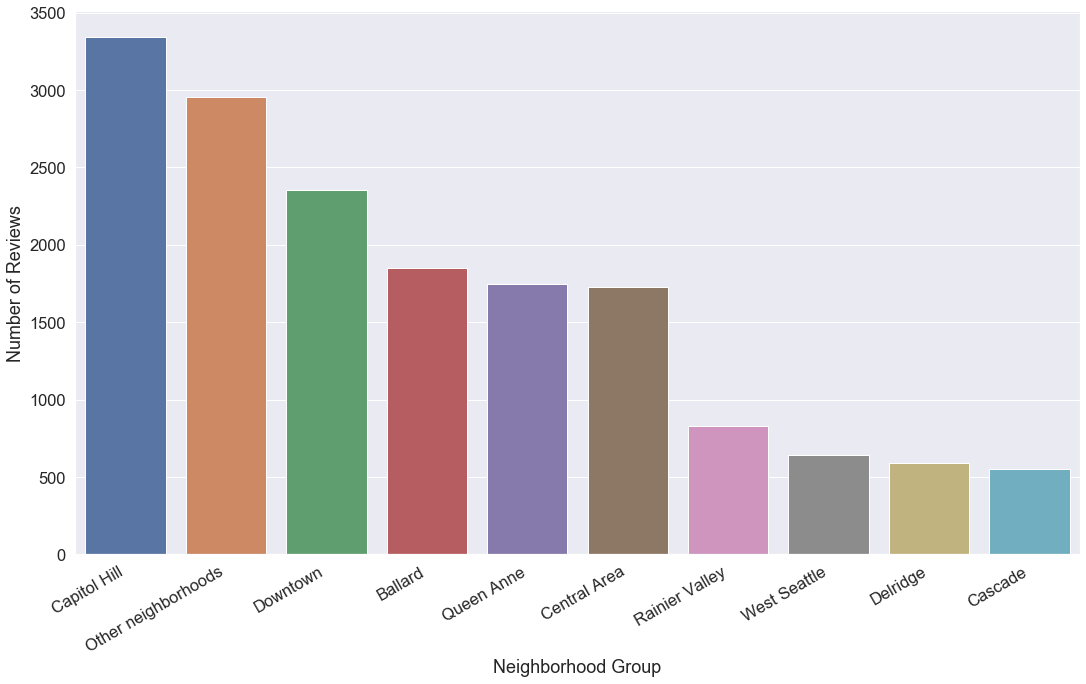

In [93]:
# Top3 popular neighborhood groups would be Capitol Hill, Downtown and Ballard

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)

pop_plot = sns.barplot(
    data= pop_df,
    x= 'neighbourhood_group_cleansed',
    y= 'number_of_reviews')

pop_plot.figure.set_size_inches(18,10)
pop_plot.set(xlabel='Neighborhood Group', ylabel='Number of Reviews')

pop_plot.set_xticklabels(pop_plot.get_xticklabels(), rotation=30, horizontalalignment='right')

In [49]:
# Question 1.2: How's the average rating and options of top 3 popular neighborhoods look like?

In [101]:
a = ["Capitol Hill","Downtown","Ballard"]

list_df1 = list_df[list_df['neighbourhood_group_cleansed'].isin(a)]
list_df1.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].mean().sort_values(ascending = False)

neighbourhood_group_cleansed
Ballard         95.536585
Capitol Hill    93.657143
Downtown        92.747368
Name: review_scores_rating, dtype: float64

In [102]:
list_df1.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].count().sort_values(ascending = False)

neighbourhood_group_cleansed
Capitol Hill    140
Downtown         95
Ballard          41
Name: review_scores_rating, dtype: int64

In [103]:
# Ballard neighborhood has highest ratings but relatively less options while capitol hill and downtown offers more options.

## Question 2: What should the couple expect about the price range of the airbnbs in the popular neighrborhoods if they wants to stay for a long weekend?

In [163]:
pd.set_option('mode.chained_assignment', None)

In [164]:
#filter the available options
list_df2 = list_df1[(list_df1['minimum_nights']<4)&(list_df1['host_acceptance_rate'] == "100%")]

# change the data type of the price column
list_df2['price'] = list_df2['price'].replace('[\$,]', '', regex=True).astype(float)
list_df2['cleaning_fee'] = list_df2['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [165]:
# For some columns, the cleaning fee value is missing, so calculate the average ratio of cleaning fee/price here

list_df2['cleaning_fee_ratio'] = list_df2['cleaning_fee']/list_df2['price']
c = list_df2['cleaning_fee_ratio'] .mean()

# the raio is about 42%, so we are using this to impute the missing value

list_df2.loc[list_df2['cleaning_fee'].isna() == True,'cleaning_fee'] = list_df2['price']*c

In [166]:
# total price = price * 2 + cleaning fee
list_df2['weekend_total'] = list_df2['price']*3 + list_df2['cleaning_fee']

In [167]:
# summary for the price range
# Here I picked neighbourhood itself instead of neighborhood group because we want to know more about detailed level

weekend_min = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].min().rename('Min_price')
weekend_avg = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].mean().rename('Mean_price')
weekend_max = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].max().rename('Max_price')
Avaliable_options = list_df2.groupby(['neighbourhood_cleansed'])['weekend_total'].count().rename('Availiable_options')

In [168]:
# Take a look at the summary of the price range and availiable options

list_df3 = pd.concat([weekend_min,weekend_avg,weekend_max,Avaliable_options],axis=1)
list_df4 = list_df3.sort_values('Availiable_options',ascending=False).reset_index()

In [235]:
list_df4

,neighbourhood_cleansed,Min_price,Mean_price,Max_price,Availiable_options
0,Broadway,192.000000,351.029704,857.742350,92
1,Belltown,235.000000,427.710808,630.000000,41
2,First Hill,245.000000,416.099414,625.000000,20
3,Stevens,187.000000,372.544421,686.193880,17
4,Adams,247.000000,372.834942,575.000000,15
5,Central Business District,202.427195,441.071801,1029.290820,10
6,Loyal Heights,223.013011,298.848232,414.000000,9
7,West Woodland,257.322705,348.122297,497.000000,7
8,Pioneer Square,230.000000,551.206524,850.000000,7
9,Pike-Market,310.000000,423.742484,614.143522,6


In [229]:
# Here we see there are only few options in some neighboorhood, in order to provide visitors more options to choose
# Let's filter to the neighboors that at least have 10 airbnb options

filtered_neighbor = list_df4[list_df4['Availiable_options'] >9]['neighbourhood_cleansed']
list_df5 = list_df2[list_df2['neighbourhood_cleansed'].isin(filtered_neighbor)]
list_df5

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,cleaning_fee_ratio,weekend_total
66,3772674,https://www.airbnb.com/rooms/3772674,20160104002432,2016-01-04,Cozy Ballard Apartment,You'll feel right at home in our private entra...,Looking for a place that feels like home? Our...,You'll feel right at home in our private entra...,none,"Ballard is a quaint, Norwegian neighborhood. P...",...,NaN,WASHINGTON,t,moderate,f,f,1,3.94,0.588235,305.000000
68,7618605,https://www.airbnb.com/rooms/7618605,20160104002432,2016-01-04,1BR-Ultra Hip Ballard-Walk to Bars!,This 1BR is in a great location! Walking dist...,"1BR, open kitchen, large patio, large bathroom...",This 1BR is in a great location! Walking dist...,none,"Super Hip, Tons to do, Great Food, Great Bars,...",...,NaN,WASHINGTON,f,flexible,f,f,1,1.01,0.285714,575.000000
82,1956274,https://www.airbnb.com/rooms/1956274,20160104002432,2016-01-04,Sweet Ballard Apartment for Two,Located in the Sunset Hill/Ballard Area of Sea...,I hope this space will make my guests feel lik...,Located in the Sunset Hill/Ballard Area of Sea...,none,All the fun and interesting things there are t...,...,NaN,WASHINGTON,f,strict,f,f,1,2.11,0.600000,450.000000
89,1266459,https://www.airbnb.com/rooms/1266459,20160104002432,2016-01-04,Pretty Condo in Downtown Ballard,NaN,Stay just blocks from all that Ballard has to ...,Stay just blocks from all that Ballard has to ...,none,So much fun activity! Street festivals in the...,...,NaN,WASHINGTON,f,strict,f,f,1,0.30,0.400000,510.000000
93,6813483,https://www.airbnb.com/rooms/6813483,20160104002432,2016-01-04,Victorian Charm in Heart of Ballard,880 air conditioned sq ft in upper level (stai...,This cozy apartment resides in a 1912 historic...,880 air conditioned sq ft in upper level (stai...,none,Ballard is one of the hippest and fastest grow...,...,NaN,WASHINGTON,f,moderate,f,f,1,1.75,0.753968,473.000000
96,20927,https://www.airbnb.com/rooms/20927,20160104002432,2016-01-04,Cottage in the Heart of Ballard,A cozy cottage behind a lovely Victorian hous...,A cozy cottage behind a lovely Victorian house...,A cozy cottage behind a lovely Victorian hous...,none,Ballard is a fantastic destination neighborhoo...,...,NaN,WASHINGTON,t,moderate,f,f,2,3.64,0.112360,277.000000
104,3766866,https://www.airbnb.com/rooms/3766866,20160104002432,2016-01-04,Condo in Hip Ballard WALK,Walk everywhere from this remodeled condo in h...,Everything in this Ballard abode is remodeled....,Walk everywhere from this remodeled condo in h...,none,You will be walking distance to multiple resta...,...,NaN,WASHINGTON,f,moderate,f,f,1,0.82,0.310345,480.000000
107,5470629,https://www.airbnb.com/rooms/5470629,20160104002432,2016-01-04,Ballard Garden Apartment,Our comfortable one-bedroom apartment is a sho...,"We created our spacious, airy apartment when w...",Our comfortable one-bedroom apartment is a sho...,none,Ballard is a lively urban neighborhood with sm...,...,NaN,WASHINGTON,f,moderate,f,f,1,3.39,0.500000,420.000000
111,7501919,https://www.airbnb.com/rooms/7501919,20160104002432,2016-01-04,Apartment in Downtown Ballard,One bedroom apartment in the heart of Ballard....,"It is a modern, clean and fun apartment in the...",One bedroom apartment in the heart of Ballard....,none,We are located in the hot spot of Seattle. Yo...,...,NaN,WASHINGTON,f,flexible,f,f,1,1.37,0.200000,480.000000
117,6337492,https://www.airbnb.com/rooms/6337492,20160104002432,2016-01-04,Nice 1 bedroom apartment in Ballard,"Nice, clean and quite 1 bedroom apartment. Wak...",It is close to night life and nature.,"Nice, clean and quite 1 bedroom apartment. Wak...",none,"Golden gardens, down town Ballard night life, ...",...,NaN,WASHINGTON,f,flexible,f,f,1,0.65,NaN,274.477552


[Text(0, 0, 'Adams'),
 Text(0, 0, 'Belltown'),
 Text(0, 0, 'Central Business District'),
 Text(0, 0, 'First Hill'),
 Text(0, 0, 'Broadway'),
 Text(0, 0, 'Stevens')]

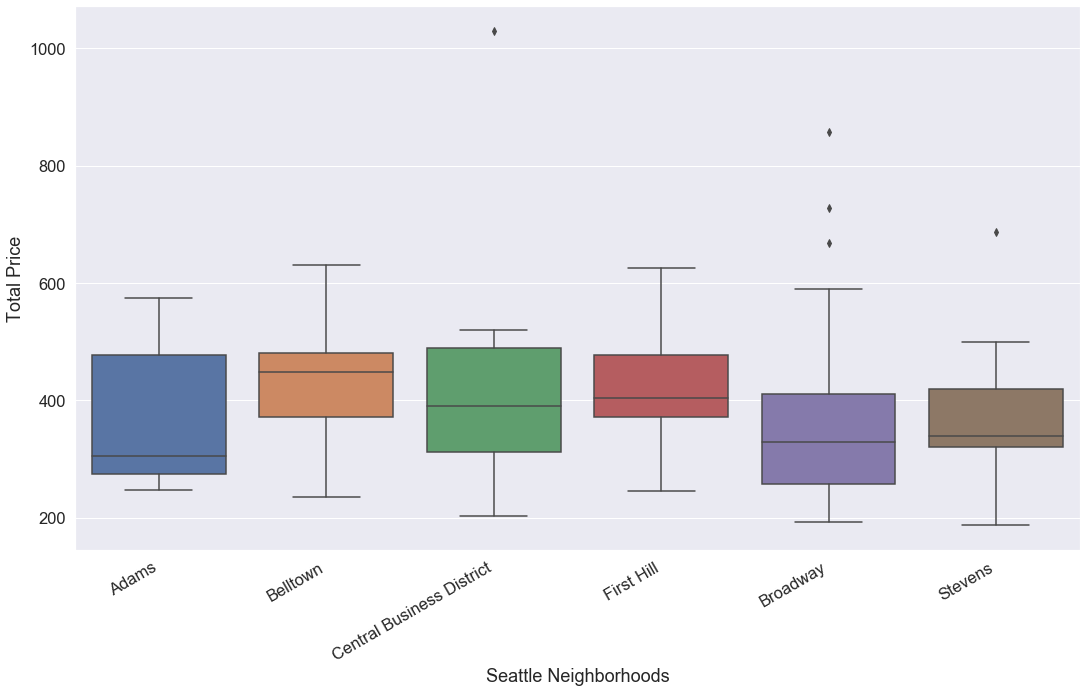

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1.5)

neigh_plt = sns.boxplot(x="neighbourhood_cleansed",
                            y="weekend_total",
                            data=list_df5)

neigh_plt.figure.set_size_inches(18,10)
neigh_plt.set(xlabel='Seattle Neighborhoods', ylabel='Total Price')

neigh_plt.set_xticklabels(neigh_plt.get_xticklabels(), rotation=30, horizontalalignment='right')

In [211]:
# The couple should expect the price range of staying in the major neighborhoods to be $200 - $600

## Question 3: How did the price of the Airbnb impact customer experience?

In [231]:
# Get the price dist
list_df5['weekend_total'].quantile([0.25,0.5,0.75])

0.25    291.632399
0.50    360.251787
0.75    461.590434
Name: weekend_total, dtype: float64

In [232]:
# bucket the price to quantiles
bins = [0,292,360,460,1000]
list_df5['price_group'] = pd.cut(list_df5['weekend_total'], bins)

In [233]:
avg_rating = list_df5.groupby(['price_group'])['review_scores_rating'].mean().rename('avg_rating')
avg_accuracy = list_df5.groupby(['price_group'])['review_scores_accuracy'].mean().rename('avg_accuracy')
avg_cleanliness = list_df5.groupby(['price_group'])['review_scores_cleanliness'].mean().rename('avg_cleanliness')
avg_checkin = list_df5.groupby(['price_group'])['review_scores_checkin'].mean().rename('avg_checkin')
avg_communication = list_df5.groupby(['price_group'])['review_scores_communication'].mean().rename('avg_communication')
avg_location = list_df5.groupby(['price_group'])['review_scores_location'].mean().rename('avg_location')
avg_value = list_df5.groupby(['price_group'])['review_scores_value'].mean().rename('avg_value')
option_counts = list_df5.groupby(['price_group'])['review_scores_rating'].count().rename('option_counts')

In [223]:
list_df6 = pd.concat([avg_rating,avg_accuracy,avg_cleanliness,avg_checkin,avg_communication,avg_location,avg_value],axis=1)

In [224]:
list_df6

,avg_rating,avg_accuracy,avg_cleanliness,avg_checkin,avg_communication,avg_location,avg_value
price_group,,,,,,,
"(0, 292]",91.341463,9.097561,9.317073,9.682927,9.756098,9.829268,9.317073
"(292, 360]",95.358974,9.769231,9.564103,9.871795,9.871795,9.871795,9.564103
"(360, 460]",92.065217,9.434783,9.434783,9.652174,9.586957,9.782609,9.239130
"(460, 1000]",95.108696,9.652174,9.695652,9.891304,9.956522,9.913043,9.326087


In [226]:
list_df6.to_excel('./Data/ratings.xlsx')

In [34]:
# paying more than $292 makes a difference on the accuracy and cleanliness, but wouldn't necessarily impact the checkin, communication, and location
# paying more than $360 might not be worth it since the previous customer thought it wasn't worth the value
# overall customers paying between 292 and 360 are happiest about the airbnb.